In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import preprocessing as prepro
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Load features and labels
sample = np.load(r'activation_maps_lines_image52_pixel.npy')
feat = np.load(r'activation_maps_lines_image52_labelpixel.npy')

print("The shape ",sample.shape,feat.shape)
# Reshape the data into a 2D form
num_samples = sample.shape[0]   # Total number of pixels
num_feat = sample.shape[1]  # Number of features for each pixel
X_reshaped = sample.reshape(num_samples,num_feat)
y_reshaped = feat.reshape(num_samples)  # Assume y is your pixel-wise label mask
print(X_reshaped.shape,y_reshaped.shape)


The shape  (16384, 13) (16384, 1)
(16384, 13) (16384,)


In [13]:
# A1 Question:
#Finding the class mean and centroid values'
sample = pd.DataFrame(sample,columns=np.arange(0,13))
sample['13']=feat # Adding features coulmn into the samples dataset
sample.info()
samples1=sample.loc[sample['13']==0,sample.columns[0:13]]
sample1_mean=samples1.mean()
print("The mean value of class 1: \n",sample1_mean)
samples2=sample.loc[sample['13']==255,sample.columns[0:13]]
sample2_mean=samples2.mean()
print("The mean value of class 2: \n",sample2_mean)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16384 entries, 0 to 16383
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       16384 non-null  float64
 1   1       16384 non-null  float64
 2   2       16384 non-null  float64
 3   3       16384 non-null  float64
 4   4       16384 non-null  float64
 5   5       16384 non-null  float64
 6   6       16384 non-null  float64
 7   7       16384 non-null  float64
 8   8       16384 non-null  float64
 9   9       16384 non-null  float64
 10  10      16384 non-null  float64
 11  11      16384 non-null  float64
 12  12      16384 non-null  float64
 13  13      16384 non-null  uint8  
dtypes: float64(13), uint8(1)
memory usage: 1.6 MB
The mean value of class 1: 
 0     0.008116
1     0.005523
2     0.003076
3     0.001685
4     0.001473
5     0.000794
6     0.013855
7     0.000353
8     0.000044
9     0.000000
10    0.000589
11    0.000234
12    0.074462
dtype: float64
The mean 

In [19]:
#Finding the intra class spread
samples1_spread=samples1.var()
samples2_spread=samples2.var()
print("The class spread of samples 1 is:\n",samples1_spread)
print("The class spread of samples 2 is:\n",samples2_spread)
#Finding the inter class distance
distance = np.linalg.norm(sample1_mean - sample2_mean)
print("The inter class distance between centroids of samples_1 and sample_2 is:\n",distance)

The class spread of samples 1 is:
 0     1.355777e-04
1     3.992622e-05
2     2.644357e-05
3     9.155051e-06
4     4.696421e-06
5     2.523579e-06
6     6.706456e-03
7     1.268224e-06
8     1.717706e-07
9     0.000000e+00
10    2.657077e-06
11    9.374027e-07
12    1.848212e-07
dtype: float64
The class spread of samples 2 is:
 0     1.663116e-04
1     4.558561e-05
2     2.944346e-05
3     9.979397e-06
4     4.764009e-06
5     2.757595e-06
6     9.053697e-03
7     1.393303e-06
8     2.692791e-07
9     0.000000e+00
10    2.585235e-06
11    9.986960e-07
12    1.075499e-07
dtype: float64
The inter class distance between centroids of samples_1 and sample_2 is:
 0.00469931570885149


In [ ]:
#A2 Question

feature = sample.loc[:,5]
print("Feature taken is: \n",feature)
plt.hist(feature)
plt.xlabel('The values of sample[5]')
plt.ylabel('The frequency of sample[5] values')
plt.title('The distribution of the values in the selected feature')
featuremean = feature.mean()
featurevariance = feature.var()
print("The mean of sample[5] is \n",featuremean)
print("The variance of sample[5] is \n",featurevariance)

Minkowski distance of  value 1 is:  0.039 

Minkowski distance of value 2 is:  0.019 

Minkowski distance of value 3 is:  0.017 

Minkowski distance of value 4 is:  0.016 

Minkowski distance of value 5 is:  0.016 

Minkowski distance of value 6 is:  0.016 

Minkowski distance of value 7 is:  0.016 

Minkowski distance of value 8 is:  0.016 

Minkowski distance of value 9 is:  0.016 

Minkowski distance of value 10 is:  0.016 



Text(0.5, 1.0, 'The distribution of values for the minkowski distance')

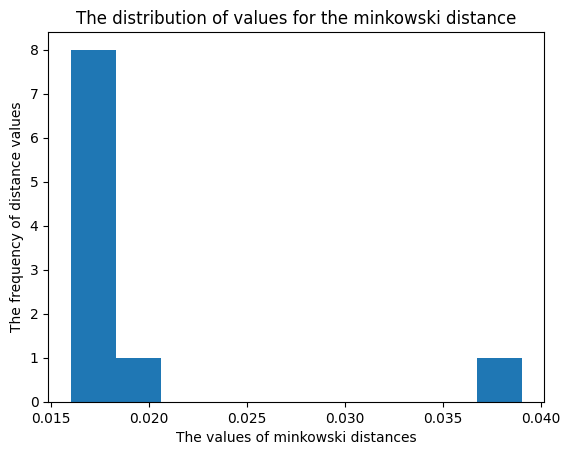

In [14]:
#A3 Question
#Find the minkowski distance between two feature vectors
from math import *
from decimal import Decimal

#Function to find the root value
def a_root(value, root):
    root_value = 1/float(root)
    return round(Decimal(value) ** Decimal(root_value), 3)

#Function for The minkowski distance
def minkowski_distance(x,y,a_value):
    return (a_root(sum(pow(abs(a-b), a_value)for a,b in zip(x,y)), a_value))

feature_vector_1 = sample.iloc[345,:]
feature_vector_2 = sample.iloc[486,:]

#Minkowski distance of r value 1
md1 = minkowski_distance(feature_vector_1, feature_vector_2, 1)
print('Minkowski distance of  value 1 is: ', md1, '\n')
#Minkowski distance of r value 2
md2 = minkowski_distance(feature_vector_1, feature_vector_2, 2)
print('Minkowski distance of value 2 is: ', md2, '\n')
#Minkowski distance of r value 3
md3 = minkowski_distance(feature_vector_1, feature_vector_2, 3)
print('Minkowski distance of value 3 is: ', md3, '\n')
# Minkowski distance of r value 4
md4 = minkowski_distance(feature_vector_1, feature_vector_2, 4)
print('Minkowski distance of value 4 is: ', md4, '\n')
#Minkowski distance of r value 5
md5 = minkowski_distance(feature_vector_1, feature_vector_2, 5)
print('Minkowski distance of value 5 is: ', md5, '\n')
#Minkowski distance of r value 6
md6 = minkowski_distance(feature_vector_1, feature_vector_2, 6)
print('Minkowski distance of value 6 is: ', md6, '\n')
#Minkowski distance of r value 7
md7 = minkowski_distance(feature_vector_1, feature_vector_2, 7)
print('Minkowski distance of value 7 is: ', md7, '\n')
# Minkowski distance of r value 8
md8 = minkowski_distance(feature_vector_1, feature_vector_2, 8)
print('Minkowski distance of value 8 is: ', md8, '\n')
# Minkowski distance of r value 9
md9 = minkowski_distance(feature_vector_1, feature_vector_2, 9)
print('Minkowski distance of value 9 is: ', md9, '\n')
# Minkowski distance of r value 10
md10 = minkowski_distance(feature_vector_1, feature_vector_2, 10)
print('Minkowski distance of value 10 is: ', md10, '\n')
plot_values = [md1,md2,md3,md4,md5,md6,md7,md8,md9,md10]
plt.hist(plot_values)
plt.xlabel('The values of minkowski distances')
plt.ylabel('The frequency of distance values')
plt.title('The distribution of values for the minkowski distance')

In [15]:
#A4 Question
#Dividing data set into training set and testing set
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Splitting reshaped data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X_reshaped, y_reshaped, test_size=0.2, random_state=42)
#A5 Question:
#Apply the KNN classifier
from sklearn.neighbors import KNeighborsClassifier as knn
classify = knn(n_neighbors = 3)
classify.fit(x_train, y_train)
#A6 Question
#Testing the accuracy of kNN classifier
print(classify.score(x_test,y_test))
#A7 Question
#Predicting the behavior of the test cases
predictk3 = classify.predict(x_test)
print(predictk3)

0.43179737564845894
[  0 255 255 ... 128   1   0]


[0.3957888312480928, 0.3378089716203845, 0.43179737564845894, 0.4296612755569118, 0.44064693317058284, 0.4510222764723833, 0.461702776930119, 0.46475434848947206, 0.4848947207812023, 0.49374427830332623]
[[ 334   43  127  634]
 [  11    3    5   24]
 [  51    7   13  116]
 [ 540   73  231 1065]]
              precision    recall  f1-score   support

           0       0.36      0.29      0.32      1138
           1       0.02      0.07      0.04        43
         128       0.03      0.07      0.05       187
         255       0.58      0.56      0.57      1909

    accuracy                           0.43      3277
   macro avg       0.25      0.25      0.24      3277
weighted avg       0.46      0.43      0.45      3277



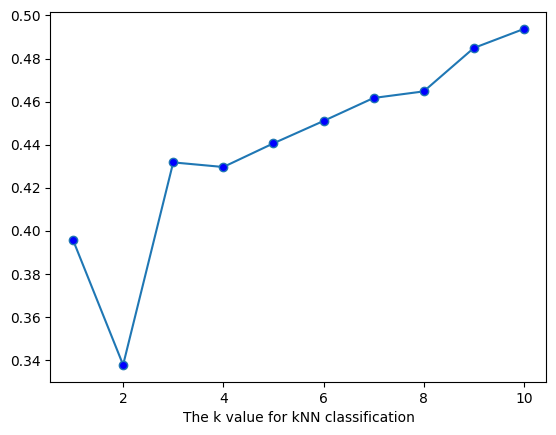

In [16]:
#A8 Question
#Checking thr kNN classifiers from k=1 to 11 finding their accuracies
from sklearn.metrics import accuracy_score
accuracy_test = []
for i in range(1,11):
    KNN = knn(n_neighbors = i)
    KNN.fit(x_train,y_train)
    predict = KNN.predict(x_test)
    accuracy_test.append(accuracy_score(predict,y_test))
print(accuracy_test)
plt.plot(np.arange(1,11), accuracy_test, marker = 'o', mfc = 'blue')
plt.xlabel("The k value for kNN classification")
#A9 Question
#Confusion matrix and calcuating the precision, recall and f_1 score
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(predictk3, y_test))
print(classification_report(predictk3,y_test))